In [1]:
import pandas as pd
data = pd.read_csv('energy.csv')

In [2]:
data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
data.shape

(768, 10)

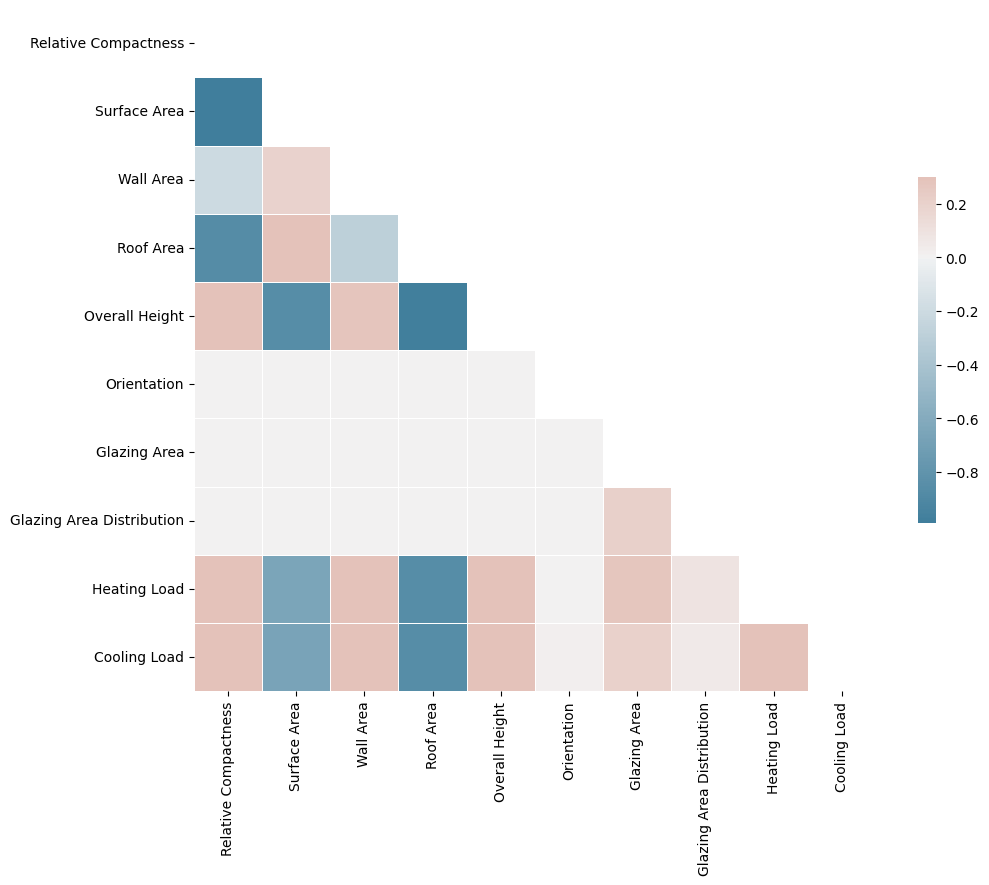

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


In [8]:
X = data.drop(columns=['Cooling Load'])  # all columns except 'Cooling Load' are features.
y = data['Cooling Load']  # 'Cooling Load' is the target.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Create a Linear Regression model.
model = LinearRegression()

In [11]:
# Fit the model to the training data.
model.fit(X_train, y_train)


LinearRegression()

In [12]:
# Predict the Cooling Load on the test data.
y_pred = model.predict(X_test)

In [18]:
y_pred

array([17.63329144, 15.99187208, 33.35812628, 41.50553052, 18.47728551,
       26.82506365, 26.97258705, 30.29312313, 20.90184597, 30.34383029,
       19.90749435, 34.57209568, 31.96681639, 13.89097551, 18.66641765,
       37.84902453, 37.19812911, 15.29507632, 17.08920626, 34.03563064,
       30.37508434, 41.8686124 , 15.31676354, 38.30434727, 17.61384054,
       37.52857554, 37.1951561 , 30.83968048, 19.57134146, 16.14695833,
       14.31142746, 15.76972611, 18.84336776, 29.51971122, 38.20090657,
       30.0267452 , 33.67473846, 38.96781509, 36.82709206, 14.78493468,
       29.54005998, 15.22884305, 11.40710573, 33.37007284, 11.43710009,
       11.51765505, 11.7835876 , 14.78960709, 31.31816631, 33.72006439,
       35.6059508 , 15.16569424, 15.93971139, 40.98576897, 15.18709362,
       17.80684938, 15.73475487, 27.08881067, 40.38840765, 36.84479112,
       16.24624334, 17.38860352, 15.49734222, 26.03306569, 30.03172736,
       38.76894341, 37.22255397, 15.13111773, 15.57599931, 15.20

In [15]:
# Calculate MAPE (Mean Absolute Percentage Error).
mape = mean_absolute_percentage_error(y_test, y_pred)

mape

0.05556986995707171